# DS/CMPSC 410 Spring 2025
# Instructor: Professor John Yen
# TAs: Peng Jin and Jingxi Zhu

# Lab 9: Neural Networks and Pre-trained DNN for Image Classification

## This lab involves two parts: (A) DNN for recognizing hand-written digits, and (B) image classification using a pre-trained DNN. The goals of this lab are for you to be able to
### - Use tensorflow and keras to implement a deep learning application for recognizing hand-written digits (MNIST)
### - Be able to assess the result of DNN learning using validation data
### - Be able to specify dimension of the different layers in a DNN.
### - Be able to use a pre-trained model to accelerate the learning of DNN.
### - Be able to compare the performance of different DNN designs.

## Exercises:
- Exercise 1: 10 points
- Exercise 2A: 15 points
- Exercise 2B: 10 points
- Exercise 2C: 10 points
- Exercise 3: 15 points
- Exercise 4A: 10 points
- Exercise 4B: 20 points
- Exercise 5: 10 points

## Total Points : 100 points

# Due: midnight, April 27th, 2025

# Early Submission Bonus (before April 23rd, 2025): 10 points


# Import tensorflow and keras

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import *

# Exercise 1 (10 points)
Enter your name here: Apoorv Ajay Thite

# Part A Training a NN for Hand-Written Character Recognition

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
len(train_labels)

60000

In [7]:
len(test_labels)

10000

In [8]:
train_images.shape

(60000, 28, 28)

## A.1 Pre-processing Input Data
In this lab, we pre-process the 28 by 28 input image into a vector of 784 (28*28) input features (one for each pixel).  An alternative is to use Convolutionary Deep Neural Networks
directly on 28 by 28 input images without reshaping.

In [9]:
train_images2 = train_images.reshape(60000, 784)
test_images2 = test_images.reshape(10000, 784)

In [10]:
train_images2.shape

(60000, 784)

In [11]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
train_images2[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### The computation of nodes in a DNN is based on ``floating point (32 bits format)``. Therefore, we need to convert the input data (reshpaed image data) from ``integer`` to ``floating point``.

In [13]:
train_images3 = train_images2.astype('float32')
test_images3 = test_images2.astype('float32')

In [14]:
train_images3[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## The value of each pixel ranges from 0 (white) to 255 (darkest black). We want to transform the input into the range of [0, 1]. This is easily done by dividing the original pixel value by 255.

In [15]:
train_images3 /= 255
test_images3 /= 255

In [16]:
train_images3[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## A.2 Design a DNN Architecture for Hand-Written Character Recognition
### Specify
- Shape of input data

### Decide
- Number of layers
- Number of nodes for each layer
- Activation function for each layer

# Exercise 2A (15 points)
Complete the code below to specify the dimension of input data and the structure of a DNN (2 hidden layers) for a DNN for hand written recognition.
- Recommended number of nodes in the first hidden layers: 1024.
- Recommended number of nodes in the second hidden layer: 512.
- The last layer is the output layer. Hence, it should have
10 nodes (one for each single digit character).


In [17]:
model = tf.keras.Sequential( [ tf.keras.Input(shape=(784,)),\
                             tf.keras.layers.Dense(1024, activation='relu'),\
                             tf.keras.layers.Dense(512, activation='relu'), \
                             tf.keras.layers.Dense(10, activation='softmax'), ])

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## A.3 Specify the learning parameters (batch size, the number of epochs, and the validation data) for training a DNN.

# Exercise 2B (10%)
Specify the learning parameters for training the DNN for hand-written character recognition. (Recommended batch_size is 64, epochs = 5 ).

In [19]:
model.fit(train_images3, train_labels, batch_size=64, epochs=5, verbose=1, \
          validation_data=(test_images3, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9005 - loss: 0.3097 - val_accuracy: 0.9663 - val_loss: 0.1125
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9765 - loss: 0.0734 - val_accuracy: 0.9784 - val_loss: 0.0705
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9856 - loss: 0.0456 - val_accuracy: 0.9777 - val_loss: 0.0740
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0348 - val_accuracy: 0.9793 - val_loss: 0.0714
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9811 - val_loss: 0.0749


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,312 (15.26 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,667,542 (10.18 MB)

# Exercise 2C (10 points)
- What is the total number of weights connecting the input layer and the first hidden layer? 784 x 1024 + 1024 = 803,840
- Is the number identical to what is shown in the model summary?  Explain the difference (hint: consider the "bias" term in each node). Yes it is identical.

# A.4 Consider and Evluate Alternative Designs for the Architecture of DNN

# Exercise 3 (15 points)
Complete the following code for a a DNN with two hidden layers, but half the size of nodes as those you chose for Exercise 2A.
 Compare results of the learned DNN to that of the previous one. Answer the following questions in the Markdown cell "Answers to Exercise 3''.
- (a) Compare the training time and performance of the DNN architecture of Exercise 2 and this one. (5 points)
- (b) Which one will you choose for this data, based on the performance above? (5 points)
- (c) If our task (and the data) is to train a DNN to classify images into 50 categories, how will this affect the choice of ``batch_size``? (5 points)

In [21]:
model2 = tf.keras.Sequential( [ tf.keras.Input(shape=(784,)),\
                             tf.keras.layers.Dense(512, activation='relu'),\
                             tf.keras.layers.Dense(256, activation='relu'), \
                             tf.keras.layers.Dense(5, activation='softmax'), ])

In [22]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model2.fit(train_images3, train_labels, batch_size=64, epochs=5, verbose=1, \
          validation_data=(test_images3, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0957 - loss: nan - val_accuracy: 0.0982 - val_loss: nan
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0982 - val_loss: nan
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0979 - loss: nan - val_accuracy: 0.0982 - val_loss: nan
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0979 - loss: nan - val_accuracy: 0.0982 - val_loss: nan
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0961 - loss: nan - val_accuracy: 0.0982 - val_loss: nan


# Answers to Exercise 3 (15 points)
- (a) Exercise 2A model (larger): Slightly longer per epoch (6–8s initially), due to more neurons (1024 → 512). Exercise 3 model (smaller): Trains faster (2–6s per epoch), thanks to fewer parameters (512 → 256)

- (b) I would choose the Exercise 2A model. It correctly outputs 10 classes with a softmax activation. Achieved high training and validation accuracy (~99% and ~98% respectively). The Exercise 3 model has a major issue: output layer only has 5 units, which is incompatible with 10-class digit classification, resulting in training failure.

- (c) When increasing the number of classes to 50: we will likely need a larger dataset to avoid overfitting. A larger batch_size (e.g., 128 or 256) may help stabilize training and gradients. But too large a batch might require more memory so we slow down convergence in early epochs.

# Part B Using Pre-trained Models for Image Classification

##### Copyright 2021 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Copyright 2021 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Retraining an Image Classifier


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/tf2_image_retraining"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/hub/tutorials/tf2_image_retraining.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/hub/tutorials/tf2_image_retraining.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/hub/tutorials/tf2_image_retraining.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/collections/image/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub models</a>
  </td>
</table>

## Introduction

Image classification models have millions of parameters. Training them from scratch requires a lot of labeled training data and a lot of computing power. Transfer learning is a technique that shortcuts much of this by taking a piece of a model that has already been trained on a related task and reusing it in a new model.

This Colab demonstrates how to build a Keras model for classifying five species of flowers by using a pre-trained TF2 SavedModel from TensorFlow Hub for image feature extraction, trained on the much larger and more general ImageNet dataset. Optionally, the feature extractor can be trained ("fine-tuned") alongside the newly added classifier.

### Looking for a tool instead?

This is a TensorFlow coding tutorial. If you want a tool that just builds the TensorFlow or TFLite model for, take a look at the make_image_classifier command-line tool that gets installed by the PIP package tensorflow-hub[make_image_classifier].



## Setup

In [24]:
!pip install tensorflow_hub

In [25]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TF version: 2.18.0
Hub version: 0.16.1
GPU is available


# Select a Pre-trained Model to Use

For starters, use https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4. The same URL can be used in code to identify the SavedModel and in your browser to show its documentation. (Note that models in TF1 Hub format won't work here.)

You can find more TF2 models that generate image feature vectors at https://www.kaggle.com/models?task=16701&framework=tensorFlow2&tfhub-redirect=true.

There are multiple possible models to try. All you need to do is select a different one on the cell below and follow up with the notebook.

In [26]:
#@title

model_name = "mobilenet_v2_100_224" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 16#@param {type:"integer"}

Selected model: mobilenet_v2_100_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Input size (224, 224)


## Set up the Flowers dataset

Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

In [27]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [28]:
# Define the batch size
BATCH_SIZE = 16  # @param {type: "integer"}

# Set up the Flowers dataset before defining the model
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

# The root directory for all photo images is under /flower_photos/flower_photos
data_dir = os.path.join(data_dir, 'flower_photos')


## Show the image data from five sub-directories in the ``flower_photos/flower_photos`` directory, one for each flower class:
- daisies
- dandelions
- roses
- sunflowers
- tulips

In [29]:
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.keras/datasets/flower_photos/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/flower_photos/daisy/25360380_1a881a5648.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/2331133004_582772d58f_m.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/2635314490_e12d3b0f36_m.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/12601254324_3cb62c254a_m.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/7335886184_d06a83f640.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/8709535323_a6bea3e43f.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/18901817451_43e2b45f6c.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/4697206799_19dd2a3193_m.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/5434913005_409c1e8b56_n.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/4993492878_11fd4f5d12.jpg
/root/.keras/datasets/flower_photos/flower_photos/daisy/1150395827_6f94a5c6e4_n.jpg
/root/.keras/datasets/fl

In [30]:
# The data_dir now is ..../flower_photos/flower_photos
def build_dataset(subset):
  return tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=.20,
    subset=subset,
    label_mode="categorical",
    seed = 123,
    image_size = IMAGE_SIZE,
    batch_size = 1)

In [31]:
train_ds= build_dataset("training")
class_names = tuple(train_ds.class_names)
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
('daisy', 'dandelion', 'roses', 'sunflowers', 'tulips')


## Note:  If we did not change the data_dir using ``os.path.join`` to add the subdirectory "flowers_photo", all of the image data will be under one class: flowers_photo.

In [32]:
do_fine_tuning = False

In [33]:
train_size = train_ds.cardinality().numpy()
train_ds = train_ds.unbatch().batch(BATCH_SIZE)
train_ds = train_ds.repeat()

normalization_layer = tf.keras.layers.Rescaling(1. / 255)
preprocessing_model = tf.keras.Sequential([normalization_layer])
do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  preprocessing_model.add(
      tf.keras.layers.RandomRotation(40))
  preprocessing_model.add(
      tf.keras.layers.RandomTranslation(0, 0.2))
  preprocessing_model.add(
      tf.keras.layers.RandomTranslation(0.2, 0))
  # Like the old tf.keras.preprocessing.image.ImageDataGenerator(),
  # image sizes are fixed when reading, and then a random zoom is applied.
  # If all training inputs are larger than image_size, one could also use
  # RandomCrop with a batch size of 1 and rebatch later.
  preprocessing_model.add(
      tf.keras.layers.RandomZoom(0.2, 0.2))
  preprocessing_model.add(
      tf.keras.layers.RandomFlip(mode="horizontal"))
train_ds = train_ds.map(lambda images, labels:
                        (preprocessing_model(images), labels))

val_ds = build_dataset("validation")
valid_size = val_ds.cardinality().numpy()
val_ds = val_ds.unbatch().batch(BATCH_SIZE)
val_ds = val_ds.map(lambda images, labels:
                    (normalization_layer(images), labels))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


## Defining the model

All it takes is to put a linear classifier on top of the `feature_extractor_layer` with the Hub module.

For speed, we start out with a non-trainable `feature_extractor_layer`, but you can also enable fine-tuning for greater accuracy.

In [34]:
do_fine_tuning = False #@param {type:"boolean"}

In [35]:
print(class_names)

('daisy', 'dandelion', 'roses', 'sunflowers', 'tulips')


In [36]:
print(IMAGE_SIZE)

(224, 224)


# Representing Color Images Using RGB Arrays
The input Images are color images, so each image is represented by three arrays of pixels (each array is 224 by 224), one for each base color: Red, Green, and Blue.  

Therefore, the ``shape`` of the input image is ``IMAGE_SIZE + (3, )'', which becomes ``(224, 224, 3)``

In [37]:
IMAGE_SIZE + (3,)

(224, 224, 3)

In [38]:
(None, )+ IMAGE_SIZE+(3,)

(None, 224, 224, 3)

# Exercise 4A (10 points)
In the code below, fill in the shape of the input image in the first layer.




In [39]:
# Continue with model building
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_handle, trainable=do_fine_tuning)(x)),
#   hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(len(class_names),  # Now class_names is defined
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,) + IMAGE_SIZE + (3,))
model.summary()


Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

# Exercise 4B (20 points)
- (1) Compute the number of parameters for each layer. (10 points)
- (2) Discuss the reason the NN Model in Exercise 4 has much less parameters compared to those in Exercise 2 and 3. (10 points)




# Answer for 4B (20 points)
- (1) The Dense layer has 6,405 parameters: 6,400 weights (1280 inputs × 5 outputs) and 5 bias terms (one per output unit). Both the Lambda and Dropout layers have 0 parameters since they do not involve trainable weights.

- (2) It uses a pre-trained feature extractor (MobileNetV2) from TensorFlow Hub, which replaces the need for deep hidden layers.


## Training the model

In [40]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])


In [41]:
print(train_size)

2936


In [42]:
print(valid_size)

734


In [43]:
print(BATCH_SIZE)

16


In [44]:
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE

In [45]:
print(steps_per_epoch)

183


In [46]:
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE
hist = model.fit(
    train_ds,
    epochs=5, steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps).history


Epoch 1/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.6889 - loss: 1.0798 - val_accuracy: 0.8556 - val_loss: 0.7213
Epoch 2/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8601 - loss: 0.7366 - val_accuracy: 0.8708 - val_loss: 0.6872
Epoch 3/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8929 - loss: 0.6684 - val_accuracy: 0.8958 - val_loss: 0.6557
Epoch 4/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9160 - loss: 0.6344 - val_accuracy: 0.8903 - val_loss: 0.6649
Epoch 5/5
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9317 - loss: 0.6100 - val_accuracy: 0.8792 - val_loss: 0.7166


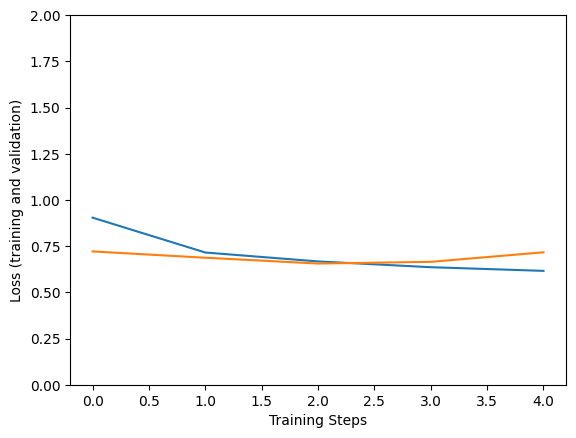

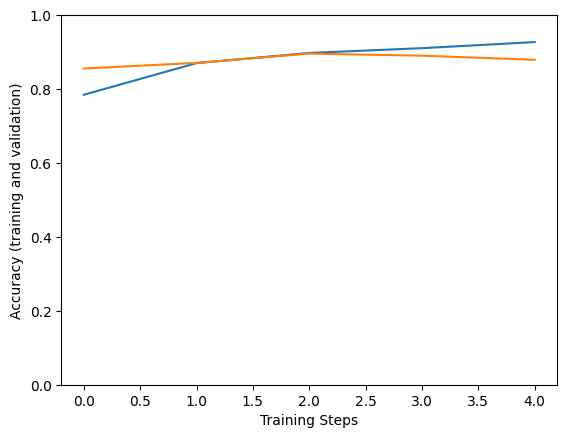

In [47]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])


In [48]:
print(hist["val_accuracy"])

[0.855555534362793, 0.8708333373069763, 0.8958333134651184, 0.8902778029441833, 0.8791666626930237]


# Exercise 5 (10 points)

1. Copy the code below to another cell, change the index in the copied code to a number greater than 0 (less than 16). (5 points)
2. Run code in both cells multiple time to see whether the predicted results are correct. Discuss what you found in the ``Answer`` text cell below. (5 points)



Try out the model on a sampled image from the validation data. The function ``next`` returns the next 16 images and labels (next batch) from the validation dataset as x (images) and y (labels).  We can then use ``index`` to access an image and its corresponding label from this sample.

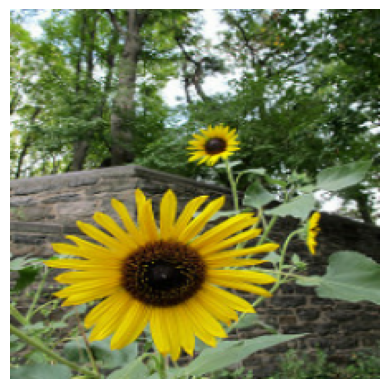

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
True label: sunflowers
Predicted label: sunflowers


In [49]:
x, y = next(iter(val_ds))
index = 0
image = x[index, :, :, :]
true_index = np.argmax(y[index])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])


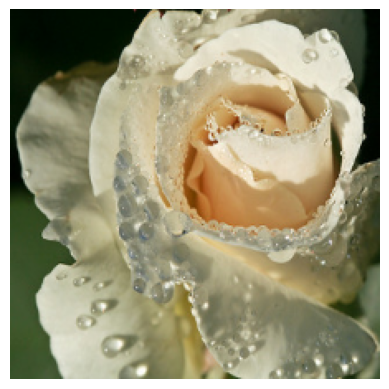

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
True label: roses
Predicted label: roses


In [51]:
x, y = next(iter(val_ds))
index = 3
image = x[index, :, :, :]
true_index = np.argmax(y[index])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

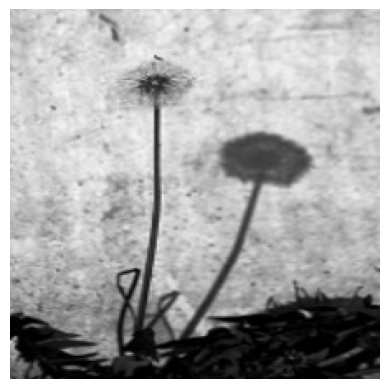

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True label: dandelion
Predicted label: dandelion


In [53]:
x, y = next(iter(val_ds))
index = 5
image = x[index, :, :, :]
true_index = np.argmax(y[index])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

In [50]:
y.shape

TensorShape([16, 5])

# Answer to Exercise 5 (2):

The model does a very good job at predicting the flower. I tried three different images and it was able to classify all of them correctly.